In [23]:
# importing pandas and numpy to import the data set and work on data frames and arrays
import pandas as pd
import numpy as np

# importing matplotlib plotting libraries
import matplotlib.pyplot as plt

# to enable plotting graphs in jupyter notebooks
%matplotlib inline

# importing seaborn for statistical plots
import seaborn as sns

# importing sklearn package's data splitting function to split the data into training and testing set
from sklearn.model_selection import train_test_split

# importing metrics to calculate the accuracy measures and confusion matrix
from sklearn import metrics

# importing logistic regression model from sklearn
from sklearn.linear_model import LogisticRegression

# importing Gaussian Naive Bayes classifier from sklearn
from sklearn.naive_bayes import GaussianNB

# importing K Nearest Neighbor classifier from sklearn
from sklearn.neighbors import KNeighborsClassifier 

In [24]:
# importing the dataset as a dataframe using pandas
Loan_Data = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')
Loan_Data.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


# Preparing the data for analysis by checking the consistency of the data, performing exploratory data analytics and removing columns that are considered irrelavant for the learning models

In [25]:
# i. Checking for empty cells in the data
Loan_Data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [26]:
# i. there are no empty cells in the data

In [27]:
# Adding a column for first two digits of the zip code to analyse if there is a geographic concentration to the number of 
# customer availing a loan account
Loan_Data['Geographic_code'] = Loan_Data['ZIP Code'].astype(str).str[0:2].astype(int)
Loan_Data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Geographic_code
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,91
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,90
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,94
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,94
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,91


In [28]:
# Adding a column to bucket age groups in the multiples of 10s to analyse if there is a concentration in number of customers 
# availing loan in a specific age group
Loan_Data['Age_Group'] = (Loan_Data['Age']//10)*10
Loan_Data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Geographic_code,Age_Group
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,91,20
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,90,40
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,94,30
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,94,30
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,91,30


In [29]:
# plotting the 5 number summary for the data
Loan_Data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [30]:
# observations based on the five number summary
# 1. Experiance cannot be a negative number. (The same has been addressed below by converting the column into absolute values)
# 2. There is a 4 digit zip code. Considering that I am analysing the geographical influence based on the first two digits
# I am not attempting to correct this error.
# 3. The distribution of the data collected for different age groups seems fairly symmetrical
# 4. The distribution of the data collected for Income, CC Avg and Mortgage value seems to be skewed to the right having a 
# longer tail on the right

Loan_Data['Experience'] = Loan_Data['Experience'].abs()

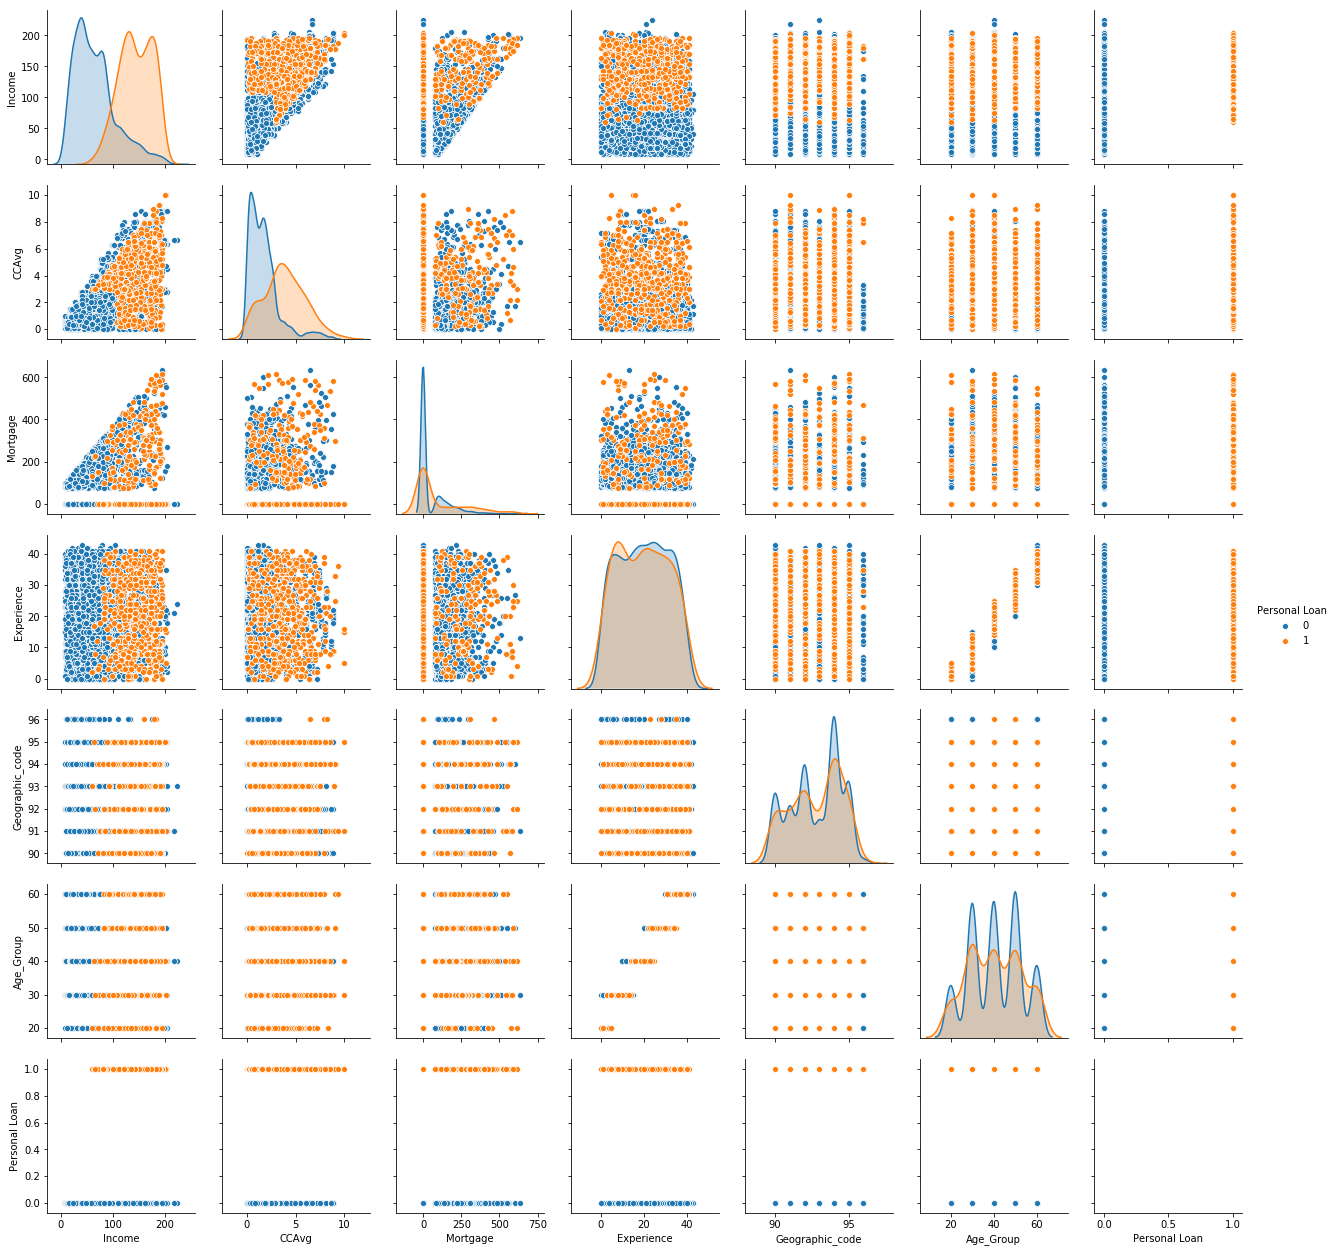

In [31]:
# pairplot on specific columns from the Loan data set
Loan_pairplot = Loan_Data[['Income', 'CCAvg', 'Mortgage', 'Experience' , 'Geographic_code', "Age_Group", 'Personal Loan']]
sns.pairplot(Loan_pairplot, hue='Personal Loan')

In [32]:
# observations based on the pair plot
# 1. The bank has a minimum annual income criteria to offer personal loans. No loan is offered to customer with annual income
# less than 60000 USD
# 2. Also of all the attributes annual income serves as a better classifier of the data points for customer availing personal loans
# 3. The other attributes - CCAvg, Mortgage, Experiance, Geographic_code and Age_Group have an overlapping distribution.
# 4. However the customer concentration in the age group of 30 to 50 is higher
# 5. Also the total customer concentration in geographic codes 94 to 95 seems higher than the rest of the geographic codes
# 6. Accordingly, these could be the target age groups and geographic locations where the higher efforts could result in higher
# conversion ratio
# 7. Customers spending between 3000 to 7000 dollars a month are more likely to avail a personal loan than the rest of the them
# 8. Customers availing a mortgage loan is more likely to avail a personal loan as well.

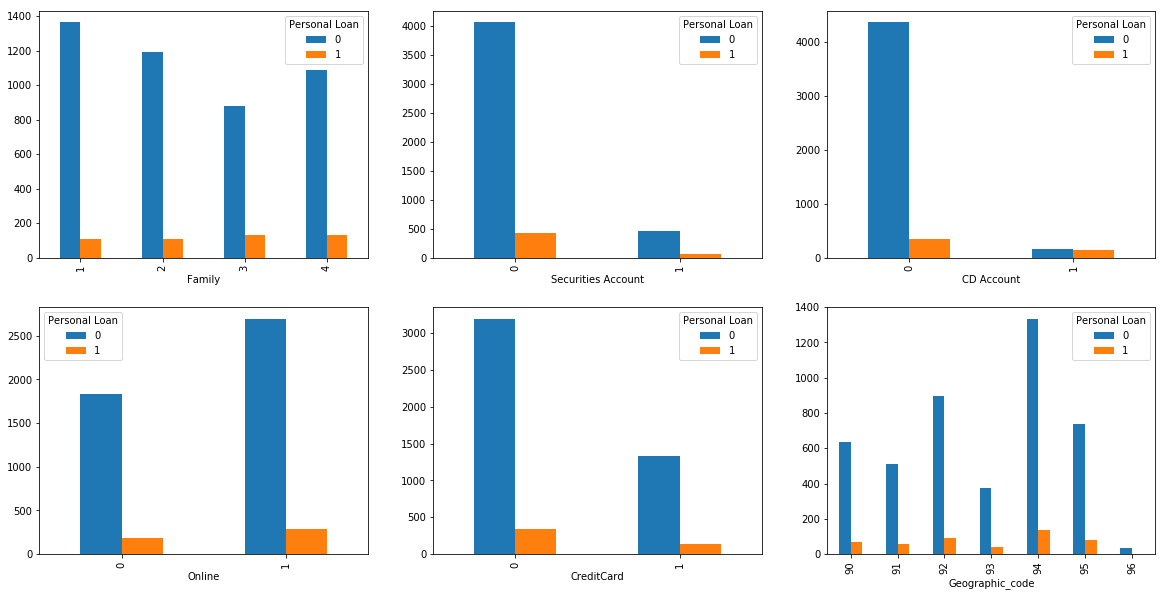

In [33]:
# plot for categorical data
Fam = Loan_Data.pivot_table(index= ['Family'], columns = 'Personal Loan', aggfunc = 'count', values = 'ID')
Sec_Acc = Loan_Data.pivot_table(index = ['Securities Account'], columns = 'Personal Loan', aggfunc = 'count', values = 'ID')
CD_Acc = Loan_Data.pivot_table(index =['CD Account'], columns = 'Personal Loan', aggfunc = 'count', values = 'ID')
Online = Loan_Data.pivot_table(index = ['Online'], columns = 'Personal Loan', aggfunc = 'count', values = 'ID')
Creditcard = Loan_Data.pivot_table(index = ['CreditCard'], columns = 'Personal Loan', aggfunc = 'count', values = 'ID')
Geo_code = Loan_Data.pivot_table(index = ['Geographic_code'], columns = 'Personal Loan', aggfunc = 'count', values = 'ID')
fig, ax = plt.subplots(2,3, figsize = (20,10))
Fam.plot(kind = 'bar',  ax = ax[0,0])
Sec_Acc.plot(kind = 'bar',  ax = ax[0,1])
CD_Acc.plot(kind = 'bar', ax = ax[0,2])
Online.plot(kind = 'bar', ax = ax[1,0])
Creditcard.plot(kind = 'bar', ax = ax[1,1])
Geo_code.plot(kind = 'bar', ax = ax[1,2])

In [34]:
# Observations made
# Size of family - Customers with a family size of 3 and 4 are more likely to take a personal loan
# Customers having a securities account are more likely to take a personal loan
# Customers having a CD account are more likely to take a personal loan
# There is no visible dependency of Customers taking a personal on having an online account
# Customers having a Creditcard are more likely to take a personal loan
# There is a geographic customer concentration in locations 92, 94 and 95

In [35]:
# Distribution of the target variable
Loan_Data['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In the given data there are 480 (9.6% of the total data set) line items of customers that have taken a personal loan which is significantly lesser as compared to the number of customers who have not opted for a personal loan (4520). However, since the total conversion ratio in the previous year was 9% and the percentage of customers who opted for the loan is 9.6% (which is almost the same as the total population) the sample data is considered as a good representative of the population and it is concluded that there is no risk of over sampling and over representation of the customers who did not opt for the personal loan.

In [36]:
# Creating a dataframe for learning by removing irrelavant columns identified based on exploratory data analysis performed above
Loan_modeldata = Loan_Data.copy()
Loan_modeldata.drop(['Age', 'ZIP Code', 'Online', 'ID'], axis =1, inplace = True)
Loan_modeldata.head()

,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,CreditCard,Geographic_code,Age_Group
0,1,49,4,1.6,1,0,0,1,0,0,91,20
1,19,34,3,1.5,1,0,0,1,0,0,90,40
2,15,11,1,1.0,1,0,0,0,0,0,94,30
3,9,100,1,2.7,2,0,0,0,0,0,94,30
4,8,45,4,1.0,2,0,0,0,0,1,91,30


In [37]:
# splitting the data into train test split
X = np.array(Loan_modeldata[['Experience','Income','Family','CCAvg','Education','Mortgage','Securities Account', 'CD Account', 'CreditCard', 'Geographic_code', 'Age_Group']])
y = np.array(Loan_modeldata['Personal Loan'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 , random_state = 6)

In [38]:
# building a logistic regression classification model
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)
LR_y_predict = model_LR.predict(X_test)


C:\Users\Jarvis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [39]:
# printing the accuracy score and confusion matrix for the Logistic regression based classification model
model_LR_score = model_LR.score(X_test, y_test)
print(model_LR_score)
print(metrics.confusion_matrix(y_test, LR_y_predict))

0.9493333333333334
[[1335   23]
 [  53   89]]


In [45]:
# creating a training and test dataset by converting all columns to its z-score values using preprocessing method from sklearn

from sklearn import preprocessing

# scale all the columns of the training and test customer data. This will produce a numpy array

X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

In [50]:
# building a logistic regression classification model on scaled data
model_LR_scaled = LogisticRegression()
model_LR_scaled.fit(X_train_scaled, y_train)
LR_scaled_y_predict = model_LR_scaled.predict(X_test_scaled)

C:\Users\Jarvis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [51]:
# printing the accuracy score and confusion matrix for the Logistic regression based classification model
model_LR_scaled_score = model_LR_scaled.score(X_test_scaled, y_test)
print(model_LR_scaled_score)
print(metrics.confusion_matrix(y_test, LR_scaled_y_predict))

0.9533333333333334
[[1339   19]
 [  51   91]]


In [40]:
# building a Naive Bayes classification model
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)
NB_y_predict = model_NB.predict(X_test)

In [41]:
# printing the accuracy score and confusion matrix for the Naive Bayes based classification model
model_NB_score = model_NB.score(X_test, y_test)
print(model_NB_score)
print(metrics.confusion_matrix(y_test, NB_y_predict))

0.8886666666666667
[[1249  109]
 [  58   84]]


In [42]:
# building a KNN - Neighbors based classification model with iterations for different hyper parameters to determine the best
# n_neighbors value
k_value = list(range(1,30,2))

from sklearn.metrics import accuracy_score

ac_scores = []

for k in k_value:
    model_KNN = KNeighborsClassifier(n_neighbors = k)
    model_KNN.fit(X_train, y_train)
    KNN_y_predict = model_KNN.predict(X_test)
    scores = accuracy_score(y_test, KNN_y_predict)
    ac_scores.append(scores)
    
optimal_k = k_value[ac_scores.index(max(ac_scores))]
print("The optimal k_value is %d" % optimal_k)

The optimal k_value is 5


In [43]:
# building a KNN model with a k value of 5
model_KNN_final = KNeighborsClassifier(n_neighbors = 5)
model_KNN_final.fit(X_train, y_train)
KNN_y_predict_final = model_KNN_final.predict(X_test)

In [44]:
# printing the accuracy score and confusion matrix for the KNN based classification model
model_KNN_score = model_KNN_final.score(X_test, y_test)
print(model_KNN_score)
print(metrics.confusion_matrix(y_test, KNN_y_predict_final))

0.9173333333333333
[[1325   33]
 [  91   51]]


As can be seen from the accuracy scores and the confusion matrix printed above a logistic regression based classification model using scaled data has the highest accuracy score of 95.33% with accurately classifying 1339 customers are customers who would not opt for a personal loan (True negatives) and 91 customers as customers who did opt for a personal loan (True positives)

Also it has the lowest number of false positives and false negatives as compared to other models.

Accordingly, I recommend to use the logistic regression based classification model using scaled data to predict the likelihood of a liability customer buying personal loans

In [97]:
# printing the coefficients determined by the Logistic Regression based classification on scaled data
coef_df = pd.DataFrame(model_LR_scaled.coef_)
coef_df['intercept'] = model_LR_scaled.intercept_
print(coef_df)
# column names are 0 - Experience, 1 - Income, 2-Family, 3-CCAvg, 4-Education, 5-Mortgage, 6-Securities Account, 7-CD Account, 
# 8-CreditCard, 9-Geographic_code, 10-Age_Group


          0         1         2         3         4         5        6  \
0 -0.016034  2.373355  0.750588  0.203618  1.386037  0.025418 -0.22912   

          7         8         9        10  intercept  
0  0.788177 -0.451229  0.038249  0.122905  -4.404262  
